## Seaborn in Python


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Seaborn Scatter plot

<Axes: xlabel='total_bill', ylabel='tip'>

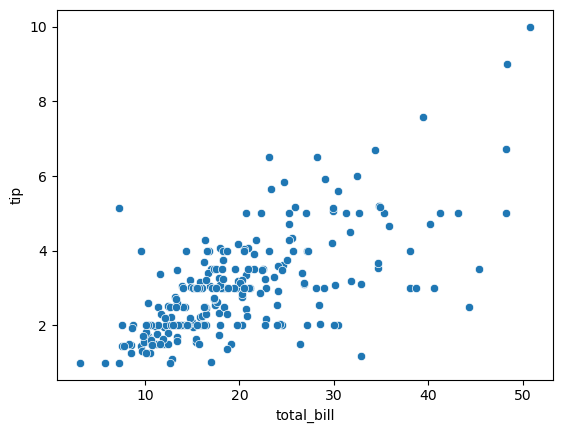

In [4]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

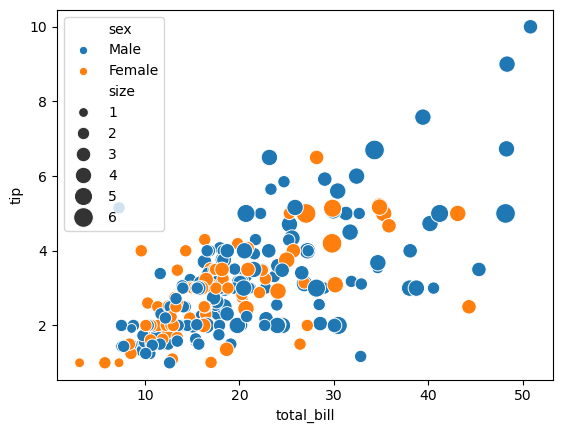

In [5]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex', size='size', sizes=(50, 200))

### Seaborn Lineplot

In [6]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<Axes: xlabel='timepoint', ylabel='signal'>

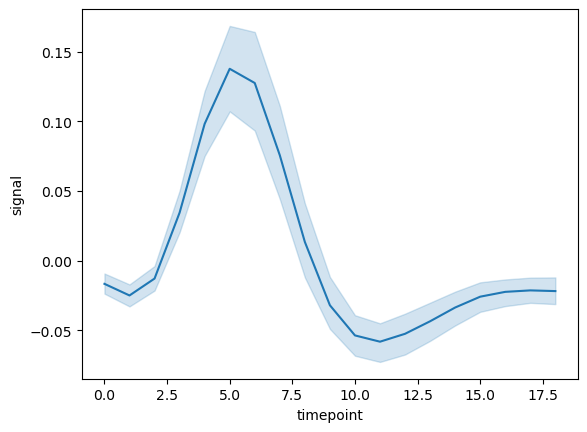

In [7]:
sns.lineplot(x='timepoint', y='signal', data=fmri)

Text(0.5, 1.0, 'Changes in Signal Intensity over Time')

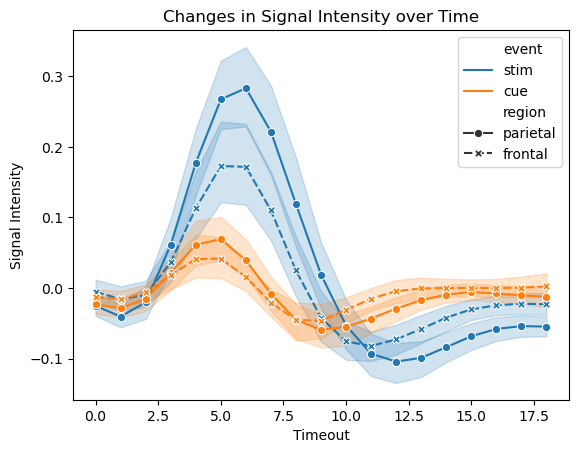

In [10]:
sns.lineplot(x='timepoint', y='signal', hue='event', style='region', markers=True, data=fmri)

plt.xlabel("Timeout")
plt.ylabel('Signal Intensity')
plt.title("Changes in Signal Intensity over Time")

### Seaborn Bar Plot

In [11]:
titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='class', ylabel='fare'>

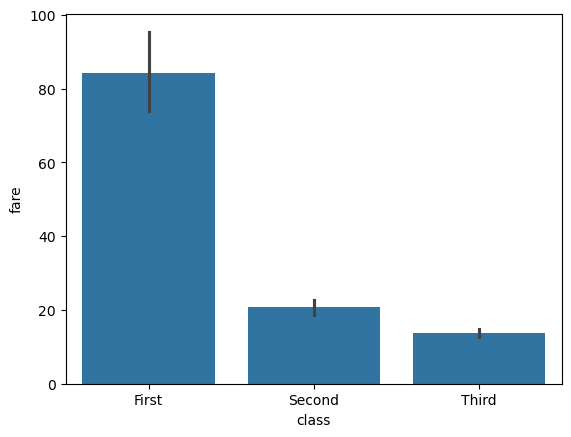

In [12]:
sns.barplot(x='class', y='fare', data=titanic)

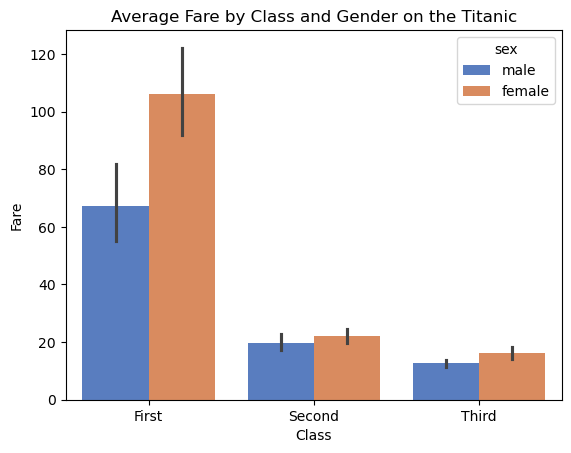

In [46]:
sns.barplot(x='class', y='fare', hue='sex', palette='muted', data=titanic)

# add labels and titles
plt.xlabel('Class')
plt.ylabel('Fare')
plt.title("Average Fare by Class and Gender on the Titanic")
plt.show()

### Seaborn Histograms

In [24]:
iris = sns.load_dataset('iris')

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='petal_length', ylabel='Count'>

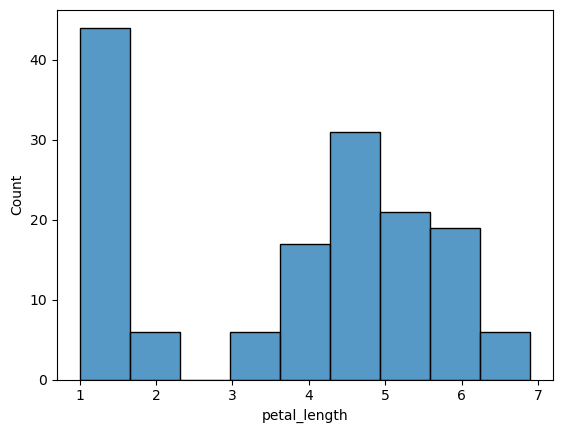

In [25]:
sns.histplot(x='petal_length', data=iris)

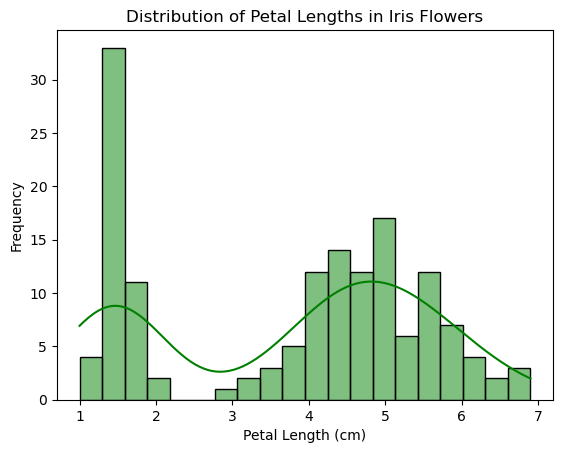

In [26]:
sns.histplot(data=iris, x='petal_length', bins=20, kde=20, color='green')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title("Distribution of Petal Lengths in Iris Flowers")

plt.show()

### Seaborn Density Plots

<Axes: xlabel='total_bill', ylabel='Density'>

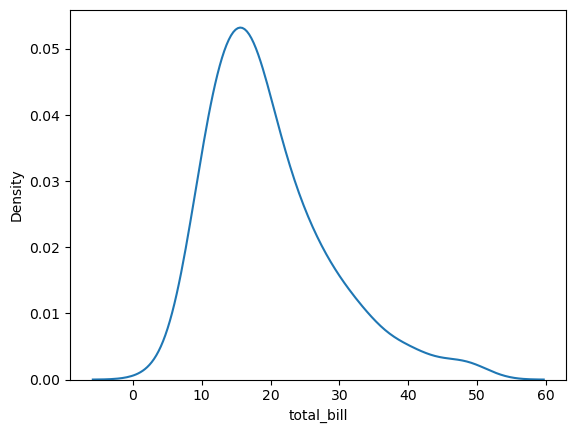

In [27]:
sns.kdeplot(data=tips, x = 'total_bill')

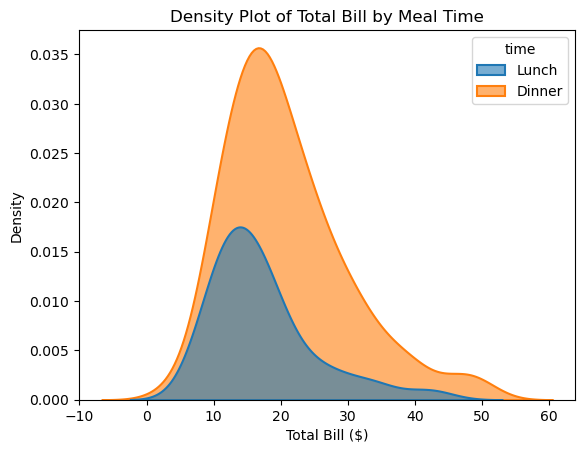

In [28]:
sns.kdeplot(data=tips, x='total_bill', hue='time', fill=True, alpha=0.6, linewidth=1.5)
plt.title("Density Plot of Total Bill by Meal Time")
plt.xlabel("Total Bill ($)")
plt.ylabel("Density")
plt.show()

### Seaborn box plots

<Axes: xlabel='day', ylabel='total_bill'>

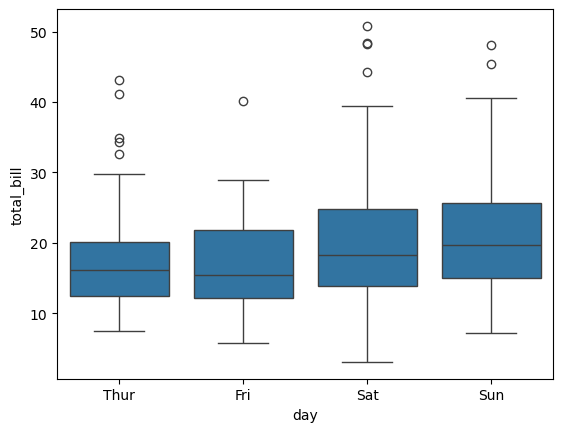

In [29]:
sns.boxplot(x='day', y='total_bill', data=tips)

Text(0, 0.5, 'Total Bill ($)')

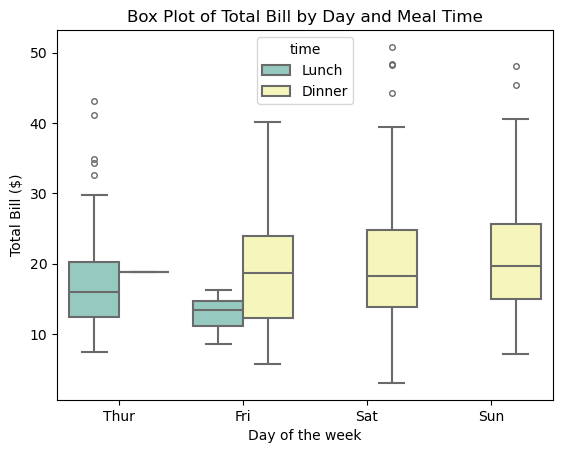

In [30]:
sns.boxplot(x='day', y='total_bill', hue='time', data=tips, palette='Set3', linewidth=1.5, fliersize= 4)

plt.title("Box Plot of Total Bill by Day and Meal Time")
plt.xlabel('Day of the week')
plt.ylabel('Total Bill ($)')

### Seaborn Violin Plot

<Axes: xlabel='species', ylabel='petal_length'>

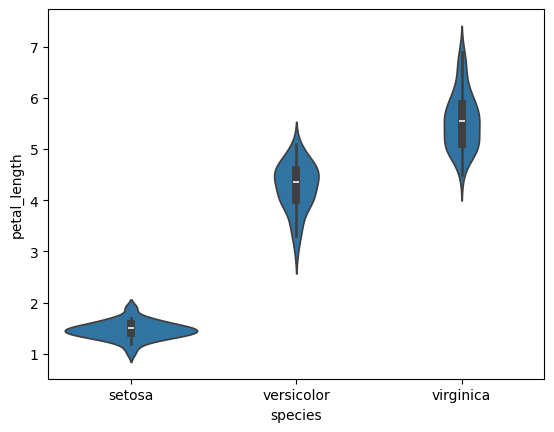

In [31]:
sns.violinplot(x='species', y='petal_length', data = iris)



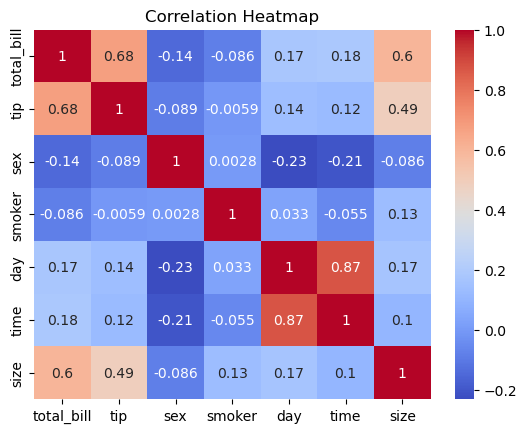

In [37]:
# Encode categorical variables into numerical values
tips_encoded = tips.copy()
for col in tips.select_dtypes(include=['category']).columns:
	tips_encoded[col] = tips_encoded[col].cat.codes

# Calculate the correlation matrix
corr = tips_encoded.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Text(50.722222222222214, 0.5, 'Month')

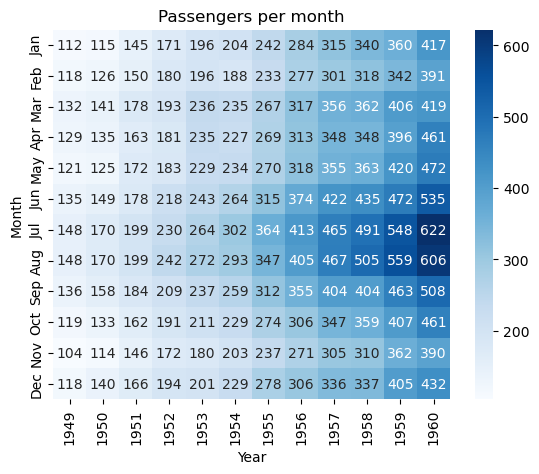

In [39]:
flights = sns.load_dataset('flights')

flights = flights.pivot(index='month', columns='year', values='passengers')

sns.heatmap(flights, cmap='Blues', annot=True, fmt='d')

plt.title('Passengers per month')
plt.xlabel('Year')
plt.ylabel('Month')

### Seaborn pair plots

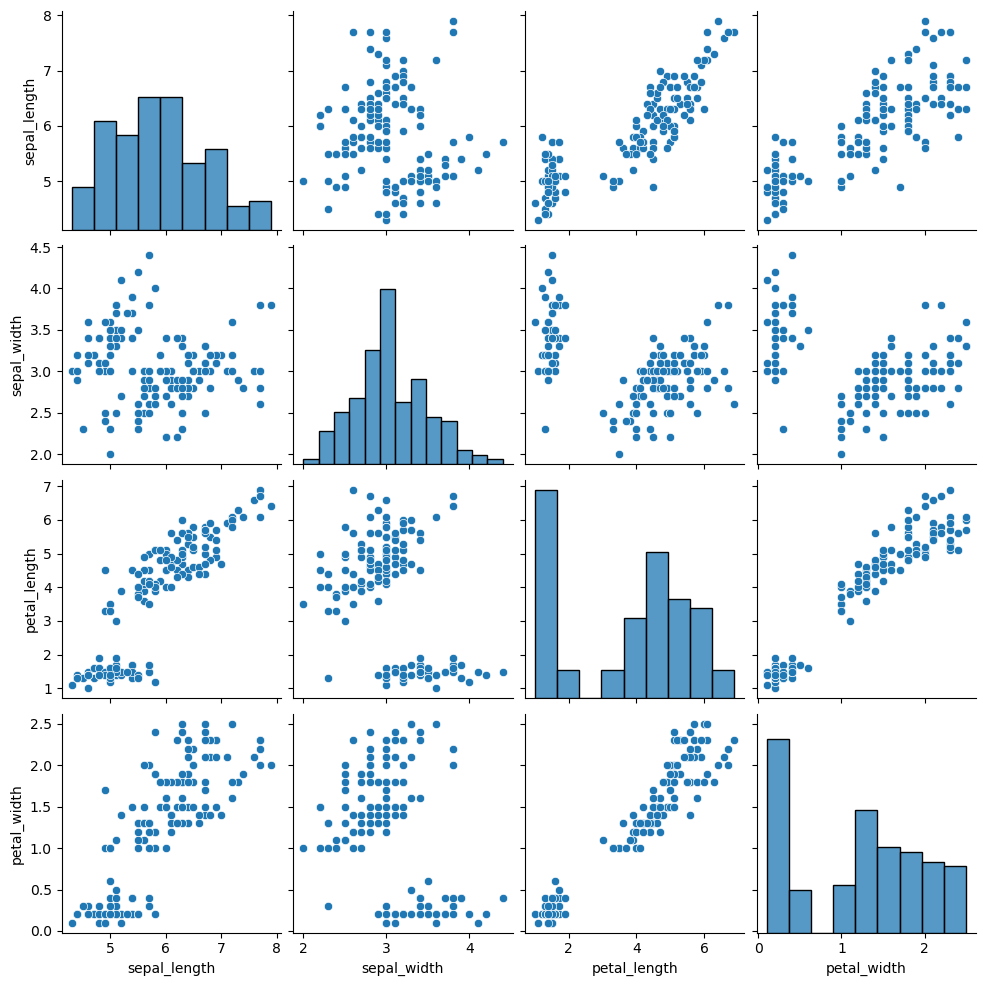

In [40]:
sns.pairplot(data=iris)
plt.show()

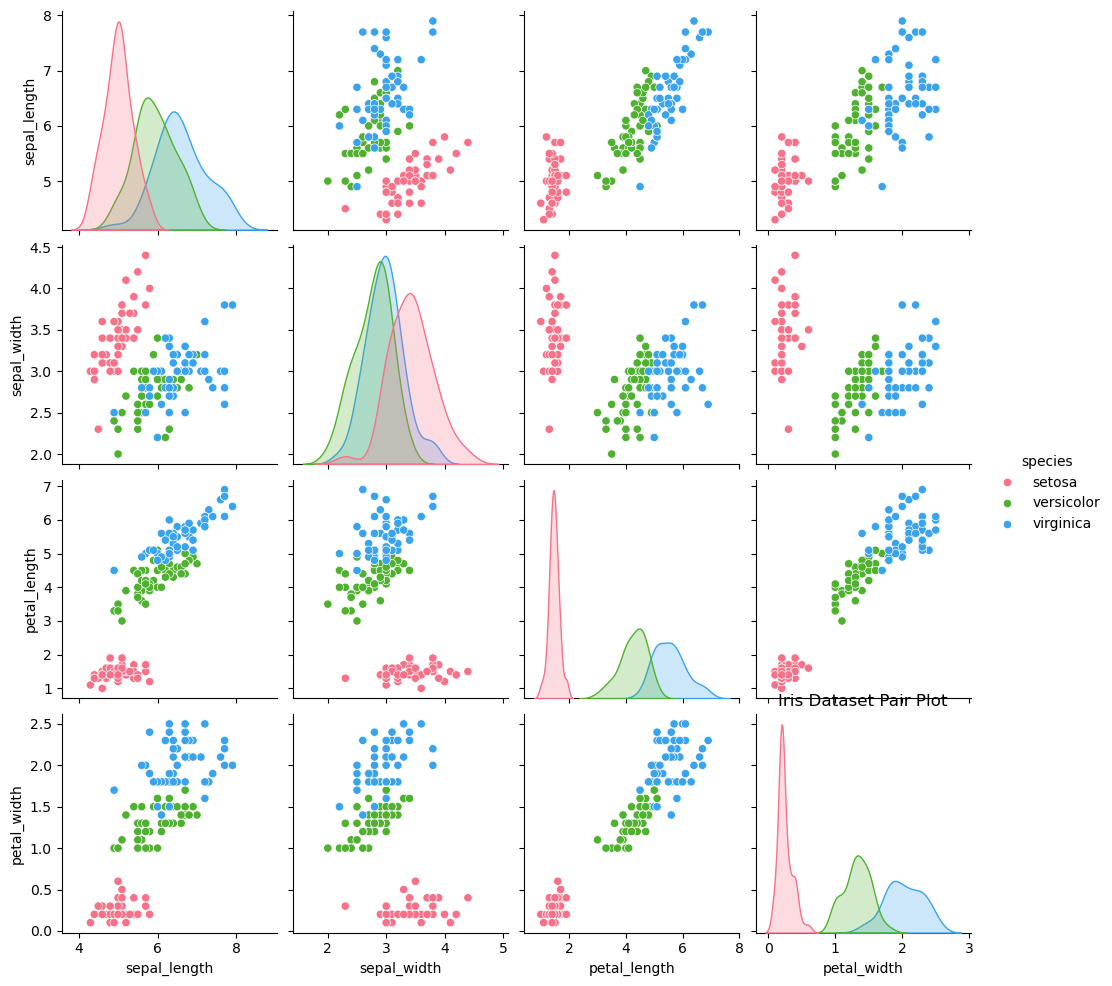

In [41]:
sns.pairplot(data=iris, hue='species', diag_kind='kde', palette='husl')
plt.title('Iris Dataset Pair Plot')
plt.show()

### Seaborn joint plot

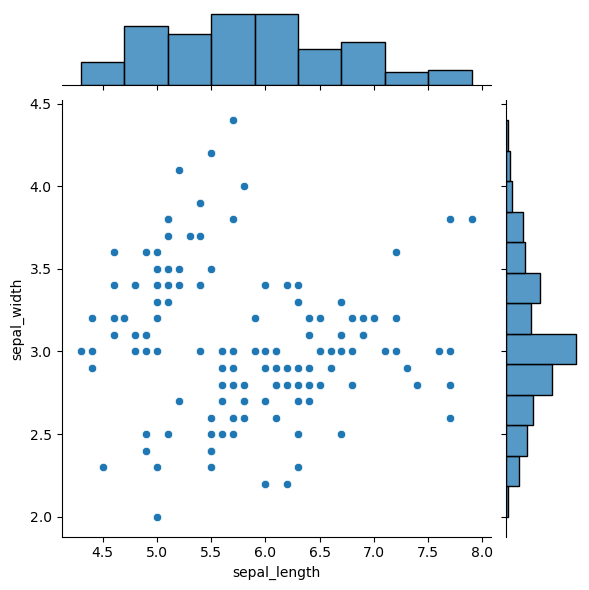

In [42]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris)


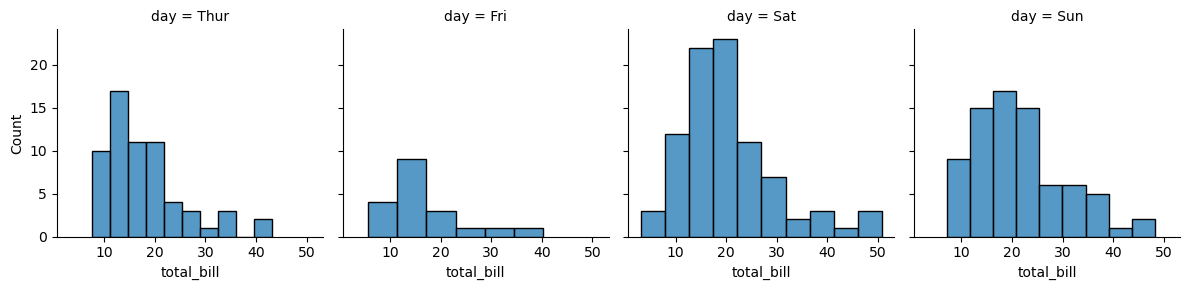

In [ ]:
g = sns.FacetGrid(data=tips, col='day')
g.map(sns.histplot, 'total_bill') 


In [6]:
dict1 = {num : [i for i in range(1, num+1) if num % i ==0] for num in range(1, 11)}
print(dict1)

{1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 2, 4], 5: [1, 5], 6: [1, 2, 3, 6], 7: [1, 7], 8: [1, 2, 4, 8], 9: [1, 3, 9], 10: [1, 2, 5, 10]}


In [2]:
# Generate dictionary of divisors for numbers 1 to 10
divisors_dict = {num: [i for i in range(1, num + 1) if num % i == 0] for num in range(1, 11)}

# Print the result
print(divisors_dict)

{1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 2, 4], 5: [1, 5], 6: [1, 2, 3, 6], 7: [1, 7], 8: [1, 2, 4, 8], 9: [1, 3, 9], 10: [1, 2, 5, 10]}
